In [1]:
datos = ""
with open("salida.txt", "r") as archi:
    datos = archi.readlines()
    datos.sort()

for linea in datos:
    linea = linea.strip("\n")
    print(linea)

nro_lineas = len(datos)



0.000001;1024
0.000001;1024
0.000001;1024
0.000001;1024
0.000001;1024
0.000001;1024
0.000001;1024
0.000001;1024
0.000001;1024
0.000001;1024
0.000001;1024
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;128
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;16
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2
0.000001;2048
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;256
0.000001;32
0.000001;32
0.000001;

In [2]:
datos = [linea.strip().split(";") for linea in datos]


In [3]:
info = {}
for linea in datos:
    if linea[1] in info.keys():
        info[linea[1]] += float(linea[0])
    else:
        info[linea[1]] = float(linea[0])

In [4]:
tamaños = info.keys()
tamaños = [int(tamaño) for tamaño in tamaños]
tiempos = info.values()
tiempos = [tiempo/(nro_lineas/len(tamaños)) for tiempo in tiempos]

In [5]:
import pandas as pd

df = pd.DataFrame(
    {
        "Tamaño" : tamaños,
        "Tiempo" : tiempos
    }
)

In [6]:
df.sort_values(by="Tamaño")

,Tamaño,Tiempo
12,1,0.000025
3,2,0.000002
7,4,0.000002
11,8,0.000002
2,16,0.000001
6,32,0.000001
10,64,0.000001
1,128,0.000001
5,256,0.000001
9,512,0.000001


In [7]:
import matplotlib.pyplot as plt

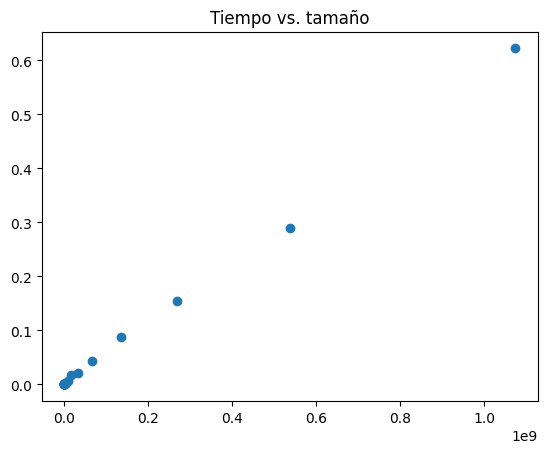

In [8]:
plt.title("Tiempo vs. tamaño")
plt.scatter(df["Tamaño"], df["Tiempo"])

In [13]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()

x = df[["Tamaño"]]
y = df["Tiempo"]

reg.fit(x, y)

LinearRegression()

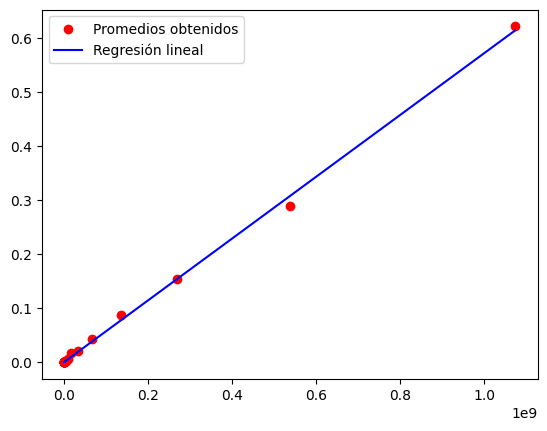

In [21]:
yPred = reg.predict(x)

plt.scatter(x, y, color="red", label="Promedios obtenidos")
plt.plot(x, yPred, color="blue", label="Regresión lineal")
plt.legend()
plt.show()